In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
import tifffile
from PIL import Image

In [2]:
def plot_band_distro(red_channel, green_channel, blue_channel, nir_channel,bin_size=5):
    # Import necessary libraries
    import matplotlib.pyplot as plt

    # Create a new figure
    plt.figure(figsize=(14, 10))

    # Plot histogram for each channel
    plt.subplot(2, 2, 1)
    plt.hist(red_channel.ravel(), bins=bin_size, color='red', alpha=0.7)
    plt.title('Red Channel')

    plt.subplot(2, 2, 2)
    plt.hist(green_channel.ravel(), bins=bin_size, color='green', alpha=0.7)
    plt.title('Green Channel')

    plt.subplot(2, 2, 3)
    plt.hist(blue_channel.ravel(), bins=bin_size, color='blue', alpha=0.7)
    plt.title('Blue Channel')

    plt.subplot(2, 2, 4)
    plt.hist(nir_channel.ravel(), bins=bin_size, color='purple', alpha=0.7)
    plt.title('Near-Infrared (NIR) Channel')

    # Show the plots
    plt.tight_layout()
    plt.show()

In [11]:
from skimage import exposure, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
#  maps the intensity values in grayscale image I to new values in J. By default, imadjust saturates the bottom 1% and the top 1% of all pixel values.
def imadjust(image,threshold=5):
   # Assuming 'image' is your grayscale or RGB image
   # Convert the image to unsigned byte format
   print(image.shape)
   height, width = image.shape
   image = img_as_ubyte(image)
   
   # Create a masked array ignoring zeros and values greater than threshold
   masked_image = np.ma.masked_less(image, threshold)
   # Compute the lower and upper percentiles
   v_min, v_max = np.percentile(masked_image.compressed(), (1, 99))
   
   
   # Use the contrast stretching function from skimage
   image_rescale = exposure.rescale_intensity(image, in_range=(v_min, v_max))
   # plot shape
   image_rescale = image_rescale.reshape(height, width)
   print(image_rescale.shape)
   
   return image_rescale

In [4]:

ortho_file = '../../dataset/raw_soil_classification_data/s2_cutted.tif'

if os.path.isfile(ortho_file):
    NameError("Path Does not exist!")

image = tifffile.TiffFile(ortho_file).asarray()

metadata = tifffile.TiffFile(ortho_file).pages[0].tags
print(metadata)

TiffTag 256 ImageWidth @10 SHORT @18 = 1974
TiffTag 257 ImageLength @22 SHORT @30 = 2056
TiffTag 258 BitsPerSample @34 SHORT[4] @218 = (16, 16, 16, 16)
TiffTag 259 Compression @46 SHORT @54 = NONE
TiffTag 262 PhotometricInterpretation @58 SHORT @66 = RGB
TiffTag 273 StripOffsets @70 LONG[2056] @4338 = (17718, 33510, 49302, 65094, 80
TiffTag 277 SamplesPerPixel @82 SHORT @90 = 4
TiffTag 278 RowsPerStrip @94 SHORT @102 = 1
TiffTag 279 StripByteCounts @106 SHORT[2056] @226 = (15792, 15792, 15792, 15792
TiffTag 284 PlanarConfiguration @118 SHORT @126 = CONTIG
TiffTag 338 ExtraSamples @130 SHORT @138 = (<EXTRASAMPLE.UNSPECIFIED: 0>,)
TiffTag 339 SampleFormat @142 SHORT[4] @12562 = ('UINT', 'UINT', 'UINT', 'UINT'
TiffTag 33550 ModelPixelScaleTag @154 DOUBLE[3] @17552 = (10.0, 10.0, 0.0)
TiffTag 33922 ModelTiepointTag @166 DOUBLE[6] @17576 = (0.0, 0.0, 0.0, 481700.0
TiffTag 34735 GeoKeyDirectoryTag @178 SHORT[32] @17624 = (1, 1, 0, 7, 1024, 0,
TiffTag 34737 GeoAsciiParamsTag @190 ASCII[30] @1

In [5]:
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
# Convert the data type to uint8
image = normalized_image.astype(np.uint8)

In [6]:
# Extract individual channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]
nir_channel = image[:, :, 3]

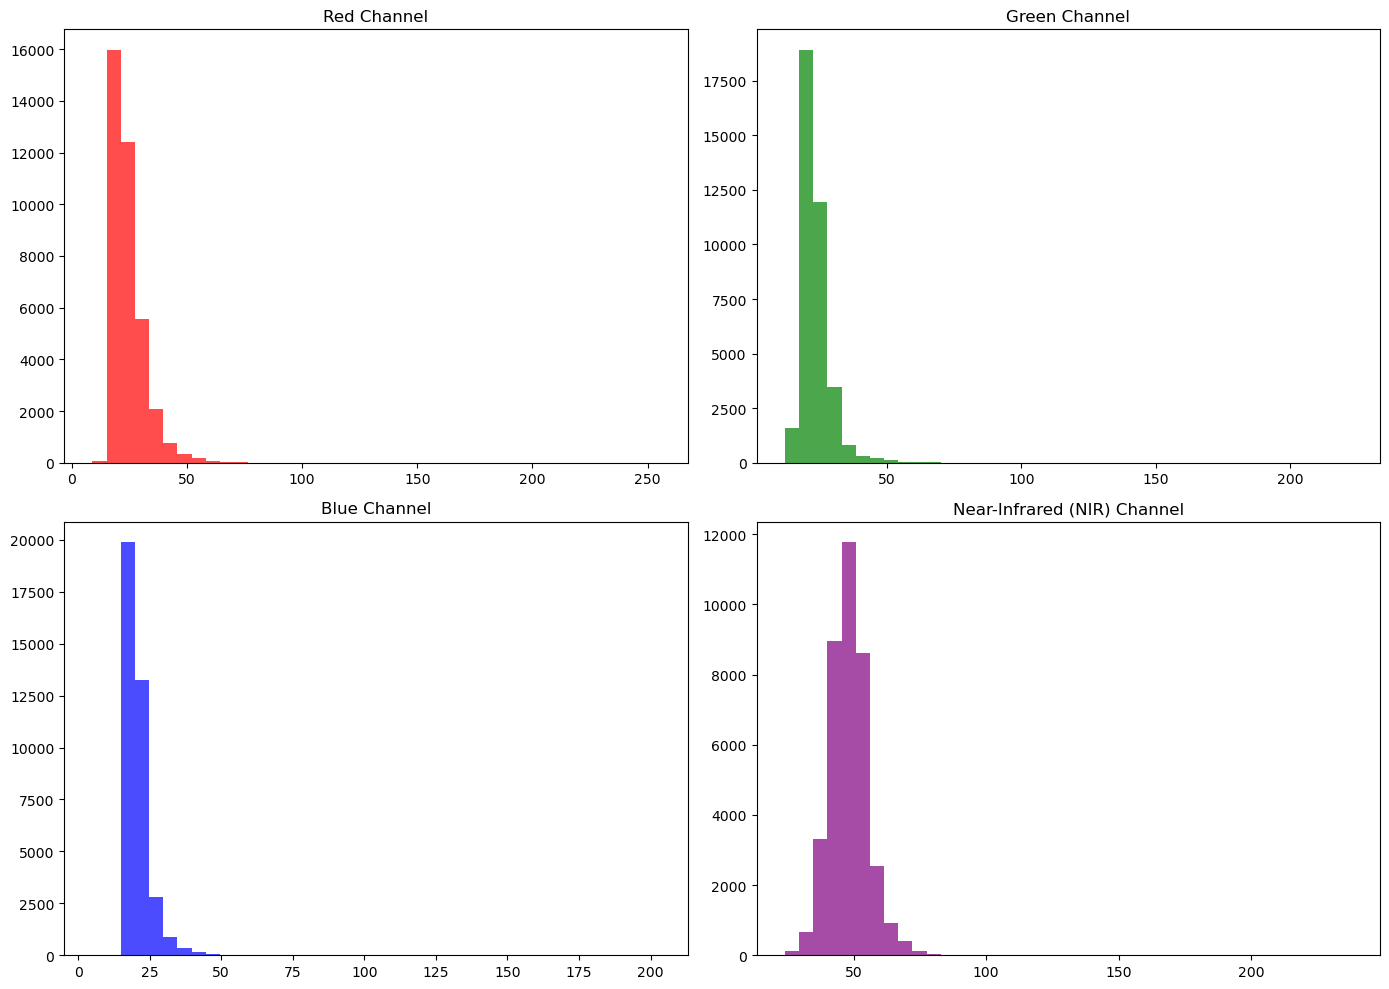

In [7]:
# remove zeros
plot_red = red_channel[red_channel != 0]
plot_green = green_channel[green_channel != 0]
plot_blue = blue_channel[blue_channel != 0]
plot_nir = nir_channel[nir_channel != 0]

plot_band_distro(plot_red, plot_green, plot_blue, plot_nir,bin_size=40)



In [12]:
red_channel = imadjust(red_channel)
blue_channel = imadjust(blue_channel)
green_channel = imadjust(green_channel)
nir_channel = imadjust(nir_channel)



(2056, 1974)
(2056, 1974)
(2056, 1974)
(2056, 1974)
(2056, 1974)
(2056, 1974)
(2056, 1974)
(2056, 1974)


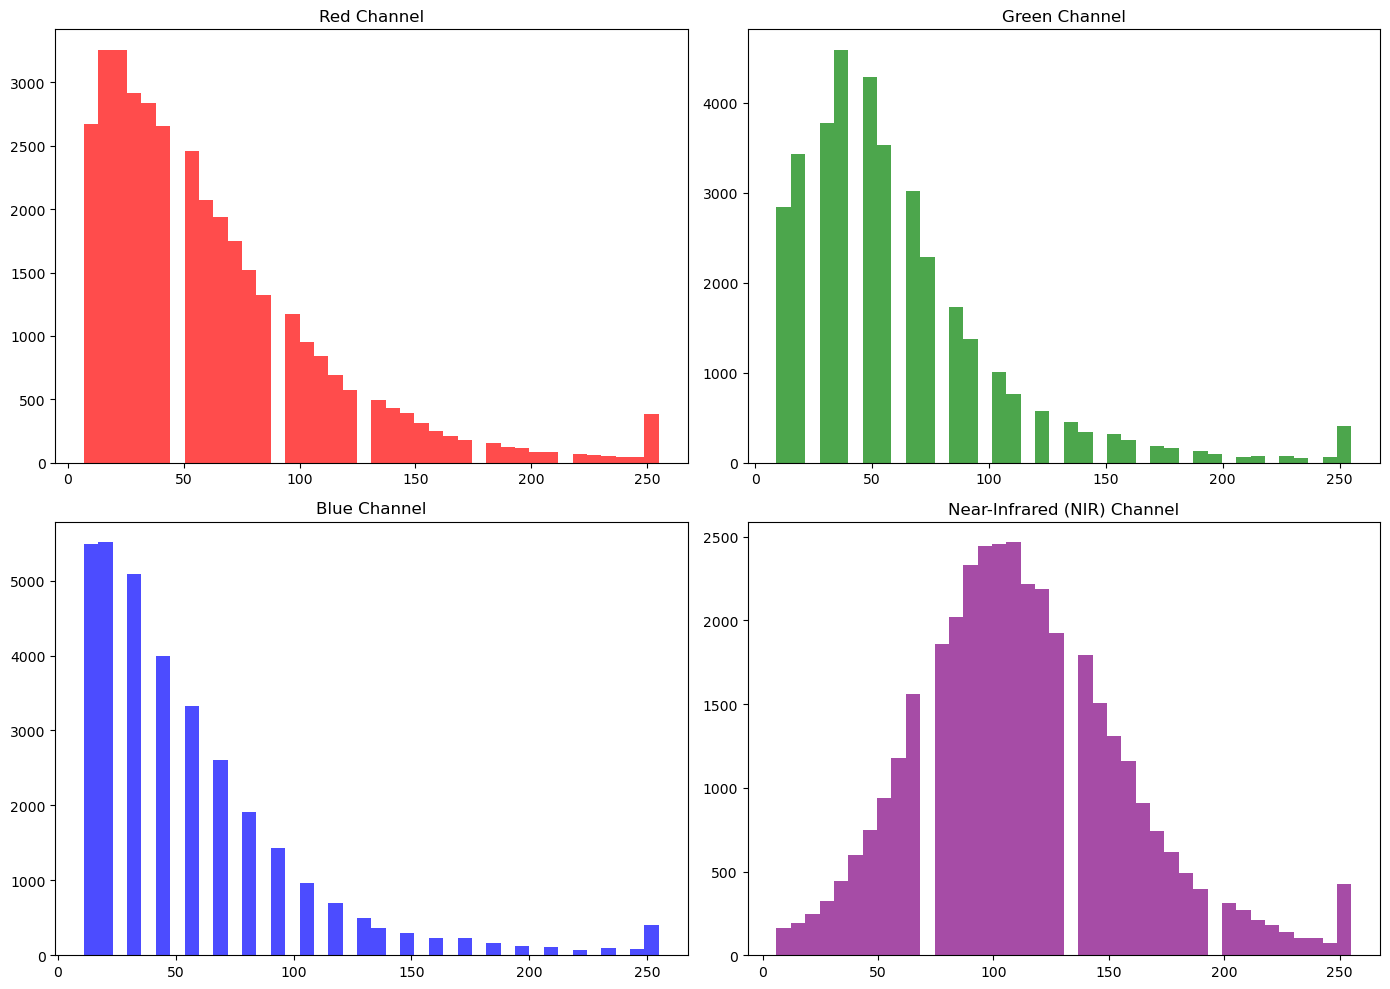

In [13]:

# remove zeros
plot_red = red_channel[red_channel != 0]
plot_green = green_channel[green_channel != 0]
plot_blue = blue_channel[blue_channel != 0]
plot_nir = nir_channel[nir_channel != 0]

plot_band_distro(plot_red, plot_green, plot_blue, plot_nir,bin_size=40)


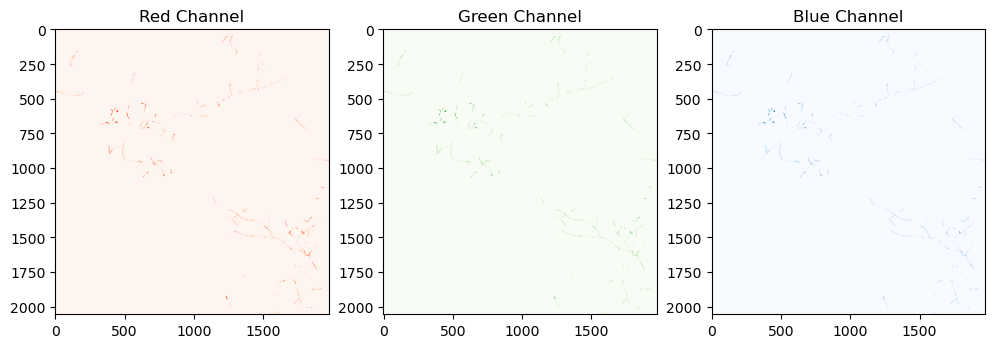

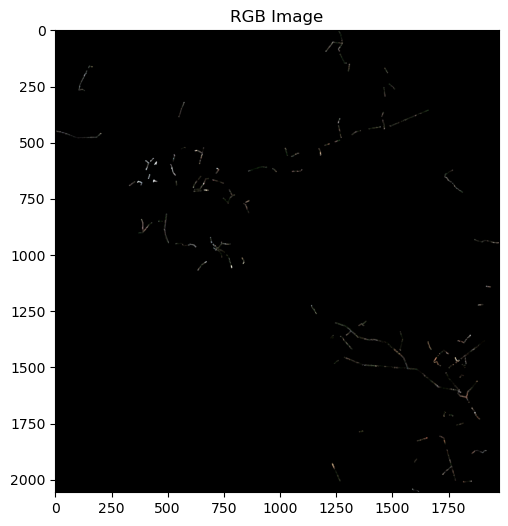

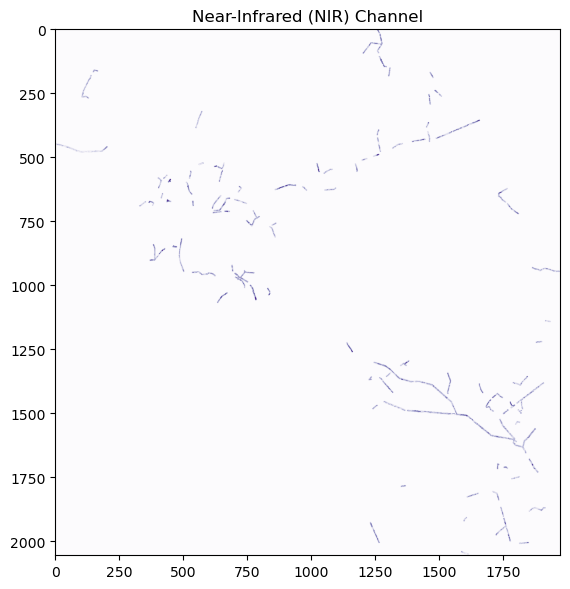

In [14]:
# Plot RGB channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')

# plot RGB in one image
fig, ax = plt.subplots(figsize=(6, 6))

# build the image
en_image = np.dstack((red_channel, green_channel, blue_channel))
# convert to uint8
file_name = ortho_file.split('.')[0].split('/')[-1]
en_image = en_image.astype(np.uint8)
import PIL
PIL.Image.fromarray(en_image).convert('RGB').save(f'{file_name}_test.png')


ax.imshow(en_image)
ax.set_title('RGB Image')

# Plot NIR channel
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(nir_channel, cmap='Purples')
ax.set_title('Near-Infrared (NIR) Channel')

# Show the plots
plt.tight_layout()
plt.show()


DSM Files